**Multiple Linear Regression** (0.5m)

Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Upload your ".csv" file to googlecolab/jupyter notebook** (1m)

read your dataset into the program

plot the correlation map if you have more than 2 columns in your dataset

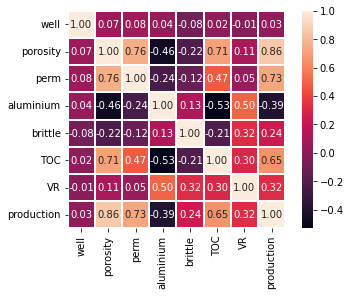

In [6]:
dataset = pd.read_csv('/content/geo.csv')
sn.heatmap(dataset.corr(), annot = True, linewidths = 1, linecolor = 'w', square = True, fmt = '.2f')  

In [4]:
dataset.head

<bound method NDFrame.head of      well  porosity  perm  aluminium  brittle   TOC    VR   production
0       1     12.08  2.92       2.80    81.40  1.16  2.31  4165.196191
1       2     12.38  3.53       3.22    46.17  0.89  1.88  3561.146205
2       3     14.02  2.59       4.01    72.80  0.89  2.72  4284.348574
3       4     17.67  6.75       2.63    39.81  1.08  1.88  5098.680869
4       5     17.52  4.57       3.18    10.94  1.51  1.90  3406.132832
..    ...       ...   ...        ...      ...   ...   ...          ...
195   196     11.95  3.13       2.97    67.18  0.80  2.06  3847.571003
196   197     17.99  9.87       3.38    44.32  0.98  2.08  5601.227131
197   198     12.12  2.27       3.52    57.07 -0.04  1.73  3409.575363
198   199     15.55  4.48       2.48    58.25  1.89  2.35  5087.592149
199   200     20.89  7.54       3.23    46.17  1.71  2.27  6662.622385

[200 rows x 8 columns]>

**Select all your features or more than 1 feature for x and label (y) value from your dataset** (5m)

Perform the necessary pre-processing functions

In [7]:
data = dataset[['porosity', 'perm', 'TOC', 'production']]  #here 4 inputs/features have been selected to predict the outcome
data.columns = ['por', 'perm', 'TOC', 'prod']  #rename your columns (optional)
data.head

<bound method NDFrame.head of        por  perm   TOC         prod
0    12.08  2.92  1.16  4165.196191
1    12.38  3.53  0.89  3561.146205
2    14.02  2.59  0.89  4284.348574
3    17.67  6.75  1.08  5098.680869
4    17.52  4.57  1.51  3406.132832
..     ...   ...   ...          ...
195  11.95  3.13  0.80  3847.571003
196  17.99  9.87  0.98  5601.227131
197  12.12  2.27 -0.04  3409.575363
198  15.55  4.48  1.89  5087.592149
199  20.89  7.54  1.71  6662.622385

[200 rows x 4 columns]>

In [8]:
data.isnull().sum()  #check for any missing values in your dataset
#data.fillna(method ='ffill', inplace = True) or data.fillna(0) or data.dropna(inplace = True)
#if there are any missing values, fill them with either the previous value or with 0 or delete that row

por     0
perm    0
TOC     0
prod    0
dtype: int64

In [9]:
x = np.array(data[['por', 'perm', 'TOC']]).reshape(-1,3) #describe your feature array (there are 3 columns but unknown no. of rows, hence reshape the array as (-1,3))
y = np.array(data['prod']).reshape(-1,1)   #describe your label array (unknown rows and 1 column)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)  #split your dataset into training data and testing data

**Train your dataset** (0.5m)

In [10]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Test your dataset** (1.5m)

In [11]:
y_pred = regr.predict(x_test)  #predict the new (test) data using your trained model
print(regr.score(x_test, y_test)) #check how well your model has performed on the test data (accuracy) - known as R2
print(np.round_(regr.coef_, decimals = 2))  #print your regression coeffcients : B1, B2 and B3
print(np.round_(regr.intercept_, decimals = 2))  #print your regression intercept: B0

0.7778471367248081
[[201.2  144.45 187.52]]
[492.94]


**Visualize your test data** (2.5m)

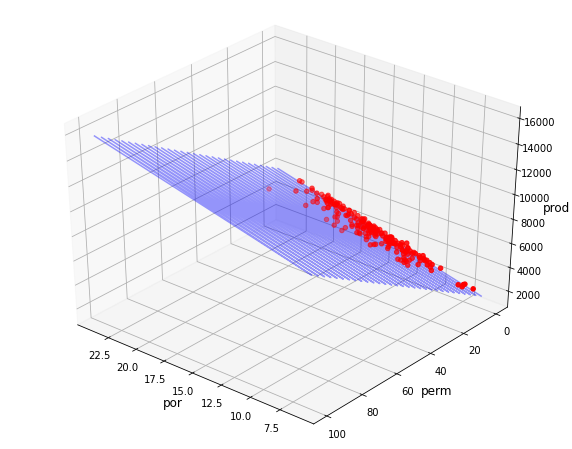

In [35]:
#data can be plotted only uptill 2 inputs (3D plot) and usually multiple regressions don't use plots
x = data[['por', 'perm']].values.reshape(-1,2)  #here we have 2 inputs
y = data['prod']
X = x[:, 0]  #define your first input, which is the first value in your rowxcolumn array
Y = x[:, 1]  #define your second input, which is the second value in your rowxcolumn array
Z = y

x_pred = np.linspace(6, 24, 30)   #describe a range for porosity values
y_pred = np.linspace(0, 100, 30)  #describe a range for perm values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)  #create a 2D x-y mesh for the above graph points
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T  #flatten the array into 1D and take its transpose

model = regr.fit(x,y) #perform linear regression
predicted = model.predict(model_viz)  #predict your model

fig = plt.figure(figsize=(10, 8))  #determine the width and height of your plot image
ax = fig.add_subplot(111, projection='3d') #plot your map in 3D
ax.scatter(X, Y, Z, c='r') #create scatter plot
ax.plot(xx_pred.flatten(), yy_pred.flatten(), predicted, alpha =0.4, color = 'blue') #this function specifies your coordinates, aplha = how well the plane should blend
ax.set_xlabel('por', fontsize=12)  #name your axis
ax.set_ylabel('perm', fontsize=12)
ax.set_zlabel('prod', fontsize=12)

ax.view_init(elev=35, azim=130)  #determine your view angle (orthgonal, front, top, at an angle)